# Project: Finding Heavy Traffic Indicators on I-94

In this project, we're going to conduct a comprehensive analysis of a dataset pertaining to westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

## Objectives

* To identify key indicators associated with heavy traffic on I-94. 

These indicators may include weather conditions, time of day, day of the week, and other relevant factors.

## Import the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Explore the I-94 Traffic Dataset

The dataset for this project, curated by John Hogue, is accessible for download from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

In [2]:
metro = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
metro.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Functions and explaination

In [5]:
def plot_histogram(data, title):
    with sns.axes_style("darkgrid"):
        plt.hist(data['traffic_volume'])
        plt.title(title, pad=10, fontsize='12', fontweight='bold')
        plt.xlabel('Traffic Volume', labelpad=10, fontsize='12')
        plt.ylabel('Frequency', labelpad=10, fontsize='12')
        plt.grid(False)
        plt.xlim(-100, 7500)
        plt.ylim(0, 8500)

    """
        The plot_histogram function takes a DataFrame data and a title as inputs
        and plots a histogram of the 'traffic_volume' column.
        It customizes the plot appearance and sets the appropriate labels and limits.
    """

        
def plot_line(data, title, x_label):
    by_group = data.groupby(x_label).mean()
    by_group['traffic_volume'].plot.line()
    plt.title(title, pad=10, fontsize='12', fontweight='bold')
    plt.xlabel(x_label.capitalize(), labelpad=10, fontsize='10')
    plt.ylabel('Average Traffic Volume', labelpad=10, fontsize='10')
    plt.xticks(fontsize='8')
    plt.yticks(fontsize='8')
    plt.grid(True, color='black', alpha=0.1)
    

    """

        The plot_line function takes a DataFrame data, a title, and an x_label as inputs.
        It groups the data by the specified x_label, computes the average traffic volume for each group,
        and plots a line chart of the average traffic volume against the x_label.
        It sets the title, x-axis label, y-axis label, and grid properties of the plot.

    """    
    
    
def plot_scatter(data, x_val, y_val, title, x_limit=None):
    sns.relplot(data=day, x=x_val, y=y_val)
    plt.title(title, pad=10, fontsize='12', fontweight='bold')
    plt.xlim(x_limit)
    plt.xlabel('Temperature in Celsius', labelpad=10, fontsize='10')
    plt.ylabel('Traffic Volume', labelpad=10, fontsize='10')
    plt.xticks(fontsize='8')
    plt.yticks(fontsize='8')
    plt.grid(True, color='black', alpha=0.1)
    
    """
    
        The plot_scatter function takes a DataFrame data, x and y variables (x_val and y_val), a title,
        and an optional x_limit as inputs. It creates a scatter plot using sns.relplot with the specified x and y variables.
        It customizes the plot appearance, sets the title, x-axis label, y-axis label, and grid properties. 
        The x_limit parameter allows setting a specific limit for the x-axis.
    
    """

## Examine the distributional patterns of Traffic Volume

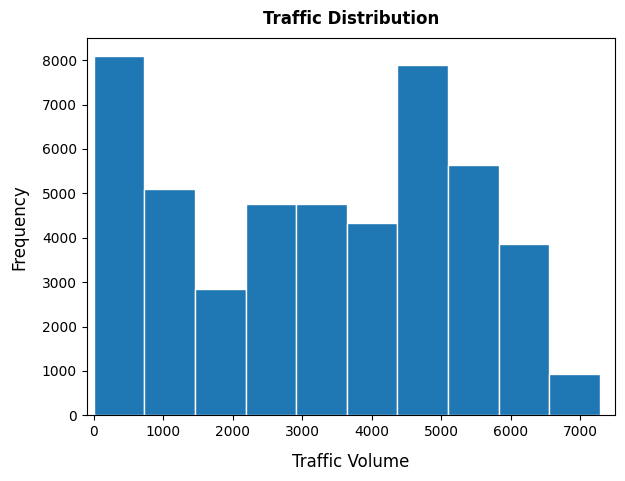

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plot_histogram(metro, 'Traffic Distribution')
plt.show()

metro['traffic_volume'].describe()

### Observation

* The graph's characteristics indicate an unclear distinction between the left and right skewness.
* The mean value is 3259.8, while the median value is 3380, indicating close proximity.
* The bar graph shows a minimum count of 7000, potentially due to a period with fewer cars on the road, possibly around that time.

I believe that the time of day, such as daytime and nighttime, definitely affects the volume of cars on the road. However, for this project's focus, it is important to analyze the significant time periods to understand and visualize when the highest traffic volume occurs.

## Transform the data_time column to datetime

In [7]:
metro['date_time'] = pd.to_datetime(metro['date_time'])

## Isolate the daytime and nighttime data

In [8]:
metro['hour'] = metro['date_time'].dt.hour

day = metro[(metro['hour'] >= 7) & (metro['hour'] < 19)]
night = metro[~((metro['hour'] >= 7) & (metro['hour'] < 19))]

## Examine the distributional patterns of Daytime and Nighttime

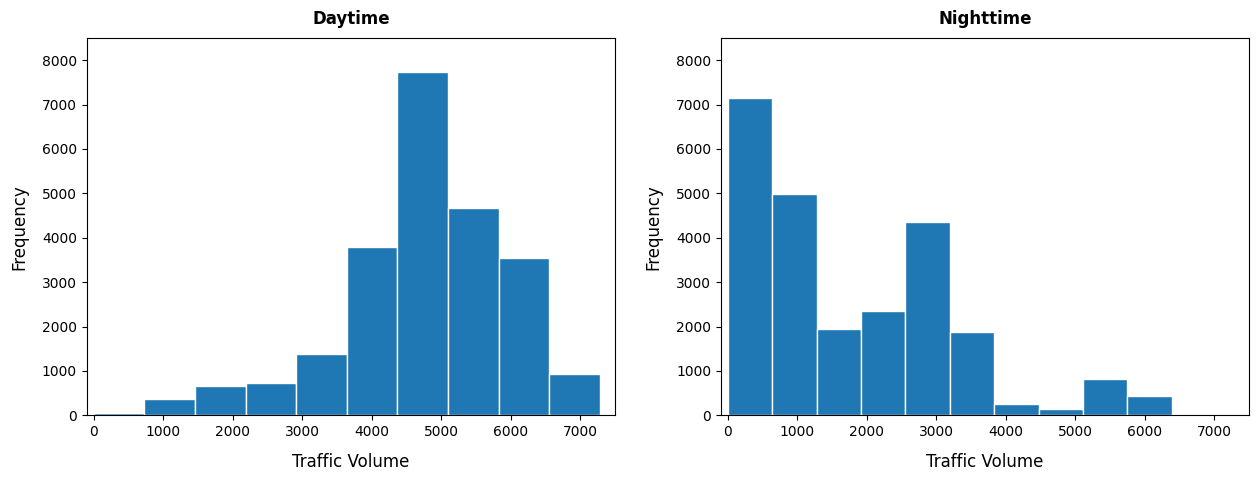

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_histogram(day, 'Daytime')

plt.subplot(1, 2, 2)
plot_histogram(night, 'Nighttime')
plt.show()

## Search for statistical data on traffic volume during daytime and nighttime

In [10]:
traffic_volume_stats = pd.concat([day['traffic_volume'].describe(), night['traffic_volume'].describe()], axis=1)
traffic_volume_stats.columns = ['Daytime', 'Nighttime']

traffic_volume_stats

,Daytime,Nighttime
count,23877.000000,24327.000000
mean,4762.047452,1785.377441
std,1174.546482,1441.951197
min,0.000000,0.000000
25%,4252.000000,530.000000
50%,4820.000000,1287.000000
75%,5559.000000,2819.000000
max,7280.000000,6386.000000


### Oberservation

#### Daytime Traffic:

* Left-skewed graph indicates traffic fluctuating between 4,000 - 6,500, with occasional periods of low congestion during the daytime.

#### Nighttime Traffic:

* Right-skewed graph depicts initially high traffic density gradually decreasing, ranging from 0 to 3,000 vehicles per hour.

#### Descriptive statistics of Daytime vs Nighttime data

* Mean analysis reveals a lower value for Nighttime at 1785.37 compared to Daytime with a mean of 4762.04.

Based on the analysis, our objective is to identify high-congestion areas. Therefore, the analysis of Daytime data aligns more closely with the intended objective.

# Time Indicators

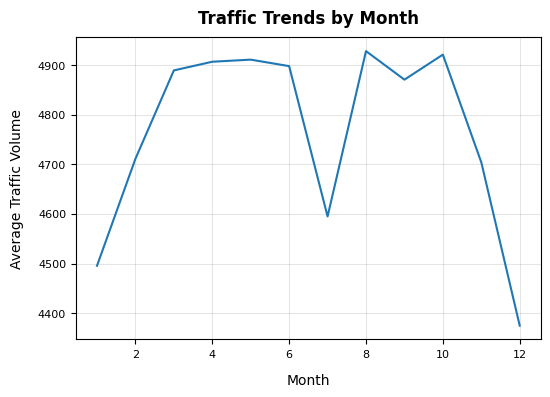

In [11]:
day['month'] = day['date_time'].dt.month
plot_line(day, 'Traffic Trends by Month', 'month')

### Observation

* September and October exhibit the highest traffic volume.
* July shows a noticeable decrease in traffic volume (further investigation is needed to identify potential causes).
* Months with low traffic volume include January, February, November, and December (likely due to the winter season and reduced travel).

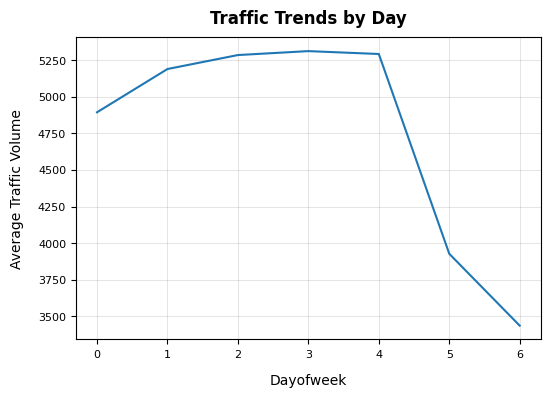

In [12]:
day['dayofweek'] = day['date_time'].dt.dayofweek
plot_line(day, 'Traffic Trends by Day', 'dayofweek')

### Observation

* There is a clear distinction in the quantity of vehicles between Business days and weekend days.

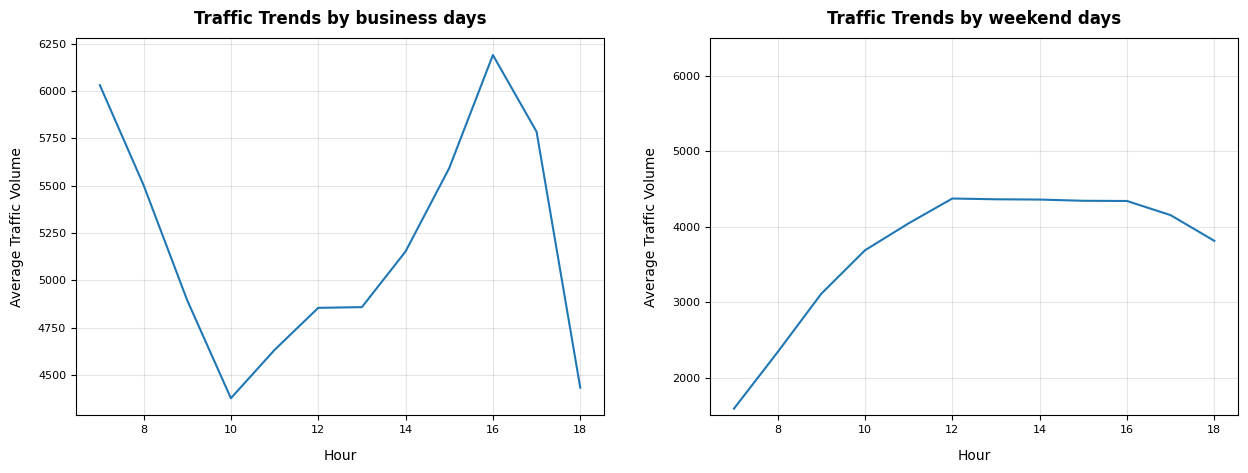

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_line(day[day['dayofweek'] <= 4], 'Traffic Trends by business days', 'hour')

plt.subplot(1, 2, 2)
plot_line(day[day['dayofweek'] >= 5], 'Traffic Trends by weekend days', 'hour')
plt.ylim(1500, 6500)
plt.show()

### Observation

#### Business days:

* The number of vehicles per hour ranges from approximately 4,300 to 6,200.
* Peak hours, from 7 AM to 8 AM and 3 PM to 5 PM, exhibit relatively high vehicle volume due to commuting hours.

#### Weekend days:

* The number of vehicles per hour ranges from approximately 1,500 to 4,300.
* The average highest number of vehicles is 4,362.29, which is still lower than the average lowest number of vehicles on business days at 4,378.41.

#### Findings from Daytime Traffic:

* Periods with high vehicle volume predominantly occur during the hot months, from March to October.
* Business days generally have higher vehicle volume compared to weekend days.
* Business days exhibit higher vehicle volume during rush hours, such as 7-8 AM or 4-6 PM.

## Weather Indicators

### Convert temperature from Kelvin to Celsius.

In [14]:
day['temp'] = day['temp'] - 273.15
day[['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']].corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

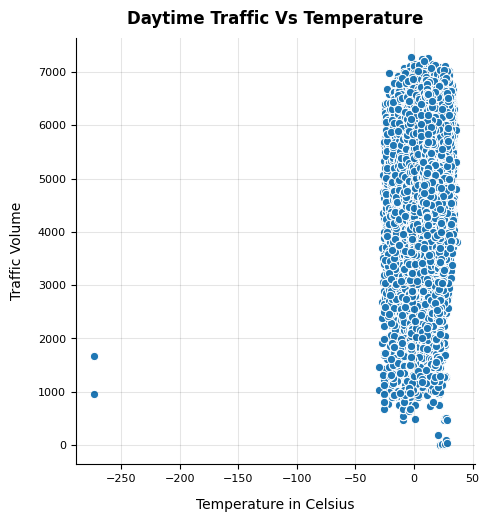

In [15]:
plot_scatter(day, 'temp', 'traffic_volume', 'Daytime Traffic Vs Temperature')
plt.show()

Based on the scatter plot, two data points were identified where the temperature value is 0. To focus on the specific area of interest, the x-axis limit was set to [-40,50].

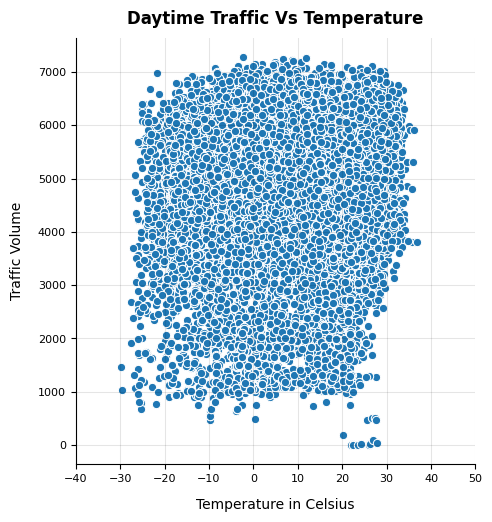

In [16]:
plot_scatter(day, 'temp', 'traffic_volume', 'Daytime Traffic Vs Temperature', x_limit = [-40,50])
plt.show()

Based on the scatter plot, it is evident that the graph does not display a clear correlation between Traffic and Temperature. Therefore, further examination of the variables `weather_main` and `weather_description` is necessary to explore additional correlations.

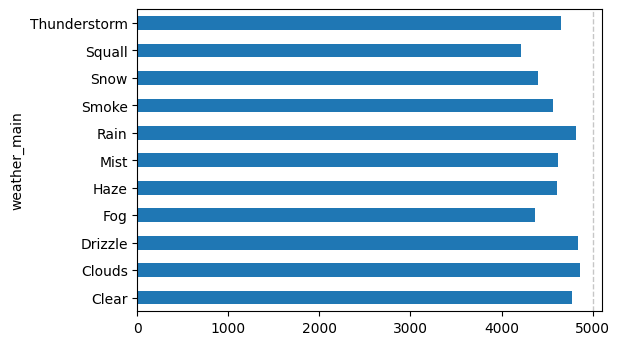

In [17]:
by_weather_main = day.groupby('weather_main').mean()

by_weather_description = day.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.axvline(x = 5000, color = '#444', linestyle = '--', linewidth=1, alpha=0.3)

### Observation

* There is no occurrence of traffic exceeding 5,000 vehicles.
* Rain, Drizzle, Clouds, and Clear weather conditions show a similar count of congested vehicles close to 5,000. However, further observation is required to determine the relationship between weather conditions and heavy traffic.


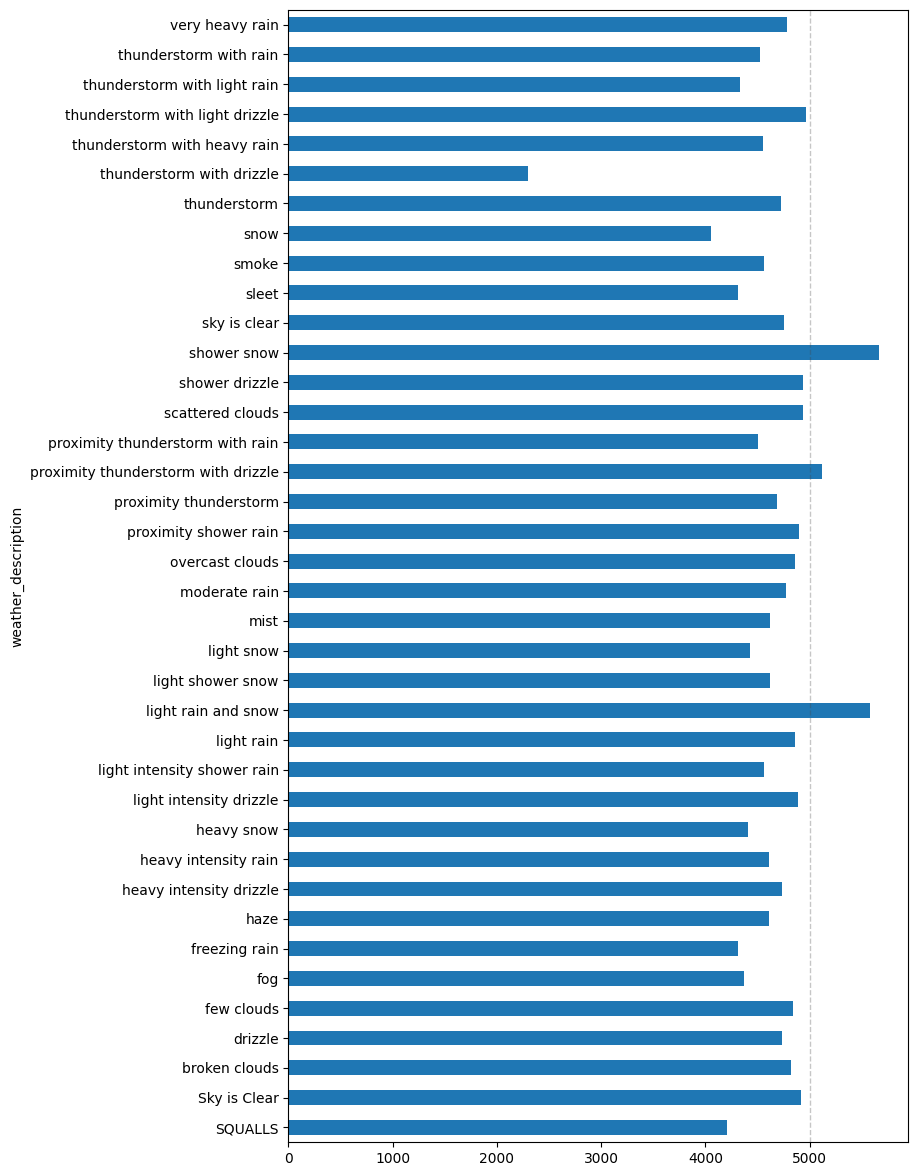

In [18]:
plt.figure(figsize = (8,15))
plt.axvline(x = 5000, color = '#444', linestyle = '--', linewidth=1, alpha=0.3)
by_weather_description['traffic_volume'].plot.barh()


### Oberservation

* There are three weather conditions with traffic congestion exceeding 5,000 vehicles: Snow Show, Proximity thunderstorm with drizzles, and Light rain and snow.
* It is likely that people choose to use cars over motorcycles or bicycles on days with severe weather conditions due to safety concerns.
* Thunderstorm and drizzle have the lowest number of vehicles, possibly because the weather reaches a critical level, prompting people to avoid road travel for safety reasons.

## Conclusion

This project aimed to identify indicators of heavy traffic on the I-94 Interstate highway. Our analysis revealed two types of indicators:

### Time Indicators

The analysis reveals the following time indicators of heavy traffic on the I-94 Interstate highway:

* **Seasonal Influence:** High traffic volume is observed primarily during the warmer months, spanning from March to October.
* **Weekday vs. Weekend:** Business days exhibit higher vehicle volume compared to weekend days.
* **Rush Hour Impact:** Heavy traffic is particularly pronounced during rush hours, notably between 7-8 AM and 4-6 PM on business days.

### Weather Indicators

The following weather conditions are associated with traffic congestion exceeding 5,000 vehicles on the I-94:

* **Snow Show:** Occurrences of snow showers contribute to increased traffic congestion.
* **Proximity Thunderstorm with Drizzles:** The presence of thunderstorms and drizzles near the vicinity leads to heightened traffic congestion.
* **Light Rain and Snow:** Traffic congestion is also observed during periods of light rain and snow.

Furthermore, it is evident that people tend to opt for car usage over motorcycles or bicycles during severe weather conditions due to safety considerations. Notably, thunderstorm and drizzle conditions have the lowest vehicle counts, possibly indicating a heightened level of weather-related risks and consequent avoidance of road travel for safety purposes.